## **A. Global Lagrange interpolation**

In [ ]:
# import all the packages here

import numpy as np
import matplotlib.pyplot as plt

In [ ]:
## Lagrange interpolation
#
# INPUT:
# f         scalar-valued function
# interval  interpolation interval [a,b]
# n         interpolation order
#
# OUTPUT:
# coeff     centered coefficients of Lagrange interpolant

def lagrangeInterp(f, interval, n):
    a, b = interval
    x = np.linspace(a, b, n+1)
    y = f(x)
    midpoint = (a + b) / 2

    # Shift x values to center the polynomial
    shifted_x = x - midpoint

    # Fit the polynomial using centered x values and the function values
    coeffs = np.polyfit(shifted_x, y, n)

    # The coeffs are returned in descending powers, which is expected by evaluateInterpolant
    return coeffs



# Test function
def test_function(x):
    return np.sin(x)

# Using the interval [0, 2*pi] and interpolation order 1 and 2:
print(f"Centered coefficients (c_i) for n = 1: {lagrangeInterp(test_function, [0, 2 * np.pi], 1)}")
print(f"Centered coefficients (c_i) for n = 2: {lagrangeInterp(test_function, [0, 2 * np.pi], 3)}")


Centered coefficients (c_i) for n = 1: [-3.89817183e-17 -1.22464680e-16]
Centered coefficients (c_i) for n = 2: [ 9.42659374e-02 -1.26488503e-16 -9.30367511e-01 -6.04915045e-16]


In [ ]:
## Evaluate interpolant
#   Yq = EVALUATEINTERPOLANT(C, I, Xq, N), with N=1, evaluates the Lagrange
#   interpolant defined by the coefficients C on the given interval I at the points
#   in the array Xq. C is an array of length n+1 (the indeces then being 0,...,n)
#   containing the polynomial coefficients in descending powers:
#
#      Yq[i] = C[0]*(Xq[i]-M)**n + C[1]*(Xq[i]-M)**(n-1) +...+ C[n-1]*(Xq[i]-M) + C[n],
#
#   where M is the midpoint of the interval
#      M = (I[0] + I[1]) / 2
#
#   Yq = EVALUATEINTERPOLANT(Cs, Is, Xq, N) evaluates the piecewise Lagrange
#   interpolants defined by the coefficients Cs(i, :) on the interval Is(i, :)
#   with N subintervals at the points in the array Xq.


def evaluateInterpolant(coeffs, intervals, xVals, N):
    fVals = np.zeros((np.size(xVals)))  #initialize an array to store function values

    if N == 1:  #check if interpolation degree is 1
        for i in range(np.size(coeffs) - 1):  #loop over each interval
            m = (intervals[0] + intervals[1]) / 2  #calc the midpoint of the interval
            fVals = np.polyval(coeffs, xVals - m)  #evaluate polynomial at each x value shifted by the midpoint
    else:
        for k in range(N):  #loop over each interval for higher degrees
            coeff_int = coeffs[k, :]  #extract coeff for the current segment
            I_int = intervals[k, :]  #extract interval for the current segment
            x_int = xVals[(I_int[0] <= xVals) & (xVals <= I_int[1])]  #extract x values within the interval
            m = (I_int[0] + I_int[1]) / 2  #calc the midpoint of the interval
            y = np.polyval(coeff_int, x_int - m)  #evaluate polynomial at each x value shifted by the midpoint
            fVals[(I_int[0] <= xVals) & (xVals <= I_int[1])] = y  #store evaluated values in fVals

    return fVals  # return the array of function values




In [ ]:
# set the value of p to use for all the questions in sections A and B
p = 5

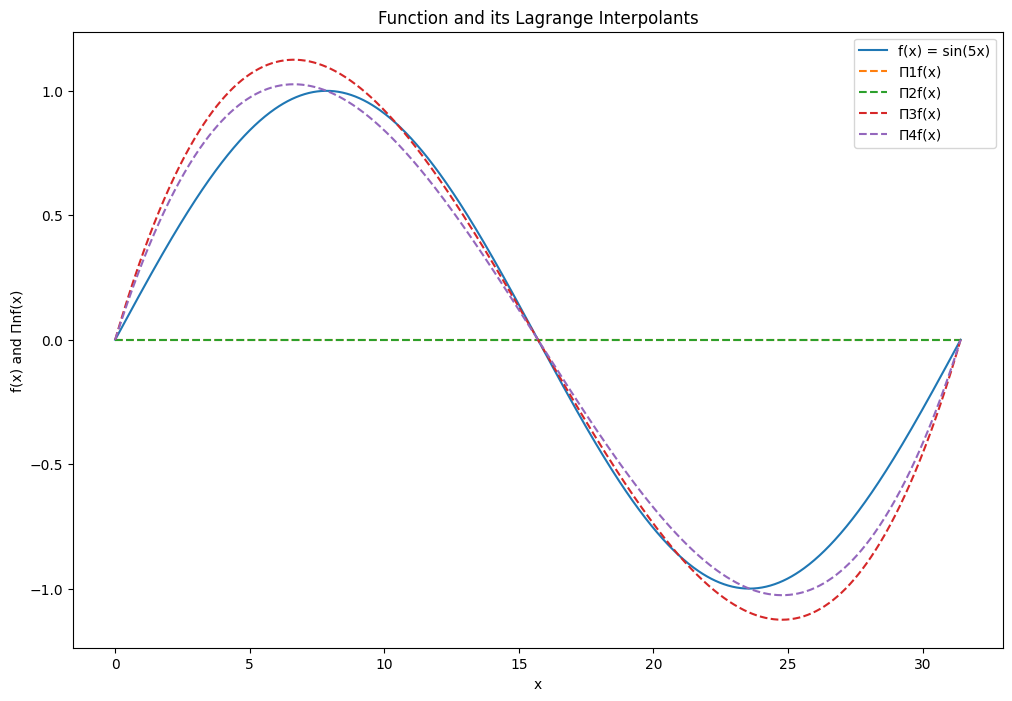

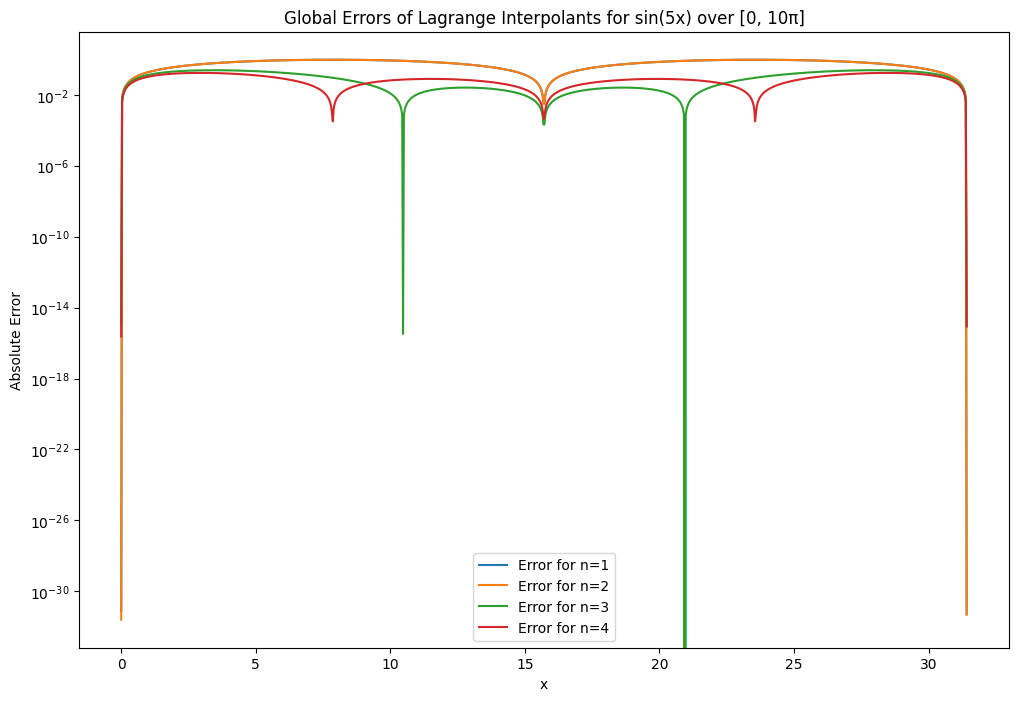

In [ ]:
# Consider f(x) = sin(x/p) on the interval [0, 2pπ], with p ∈ N. You are given the code of a Python function evaluateInterpolant which
# evaluates a single (or piecewise) Lagrange interpolant. In a single figure plot the function f and the interpolating polynomials
# Π1f(x),...,Π4f(x) on the given interval. The TA will set a value of p during the discussion, so make your whole code dependent on p.
# Then make a new figure, and using semilogy plot the error of the interpolating polynomials |f(x)−Π1f(x)|,...,|f(x)−Π4f(x)| as a function of x.

f = lambda x: np.sin(x/p)
I = [0, 2*np.pi*p]

# when calling evaluateInterpolant, you can use the following Xq array
points = int(1e3 + 1)
Xq = np.linspace(I[0], I[1], points)

# fix N and use a for loop over n to add the 4 plots to the figure
plt.figure(figsize=(12, 8))

plt.plot(Xq, f(Xq), label=f'f(x) = sin({p}x)')

for n in range(1,5):
    coeffs = lagrangeInterp(lambda x: f(x), I, n)
    fVals = evaluateInterpolant(coeffs, I, Xq, N=1)
    plt.plot(Xq, fVals, '--', label=f'Π{n}f(x)')


# add the the original function to the plot for comparison
# don't forget labelling your plot to improve readability
# useful functions: plt.title plt.xlabel plt.ylabel plt.legend

plt.title('Function and its Lagrange Interpolants')
plt.xlabel('x')
plt.ylabel('f(x) and Πnf(x)')
plt.legend()
plt.show()


# compute the 4 global errors and plot them using the same strategy
# you used before

# Define a dense range of x values for plotting and error computation
x_dense = np.linspace(I[0], I[1], 1000)

plt.figure(figsize=(12, 8))

# Compute interpolants and errors for orders 1 through 4
for n in range(1, 5):
    # Get coefficients for the nth order polynomial
    coeffs = lagrangeInterp(f, I, n)
    # Evaluate the interpolant over the dense x range
    interpolant_values = evaluateInterpolant(coeffs, I, x_dense, N=1)
    # Evaluate the original function over the same range
    function_values = f(x_dense)
    # Compute absolute errors
    errors = np.abs(function_values - interpolant_values)
    # Plotting each error curve
    plt.semilogy(x_dense, errors, label=f'Error for n={n}')

# Add plot details
plt.title(f'Global Errors of Lagrange Interpolants for sin({p}x) over [0, {p*2}π]')
plt.xlabel('x')
plt.ylabel('Absolute Error')
plt.legend()
plt.show()


# Discussion question A.1:
# For each value of n, at how many points is the error between interpolant and function (very close to) zero in the plots?
# How can this number of points be explained from the theory?

# Answer:
# The error between the interpolant and the function is zero at exactly n+1 points for each polynomial of order n.
# This is because a Lagrange polynomial of order n constructed from n+1 points will exactly pass through those n+1 points.
# These points are the interpolation nodes, where the function and its interpolant agree completely.



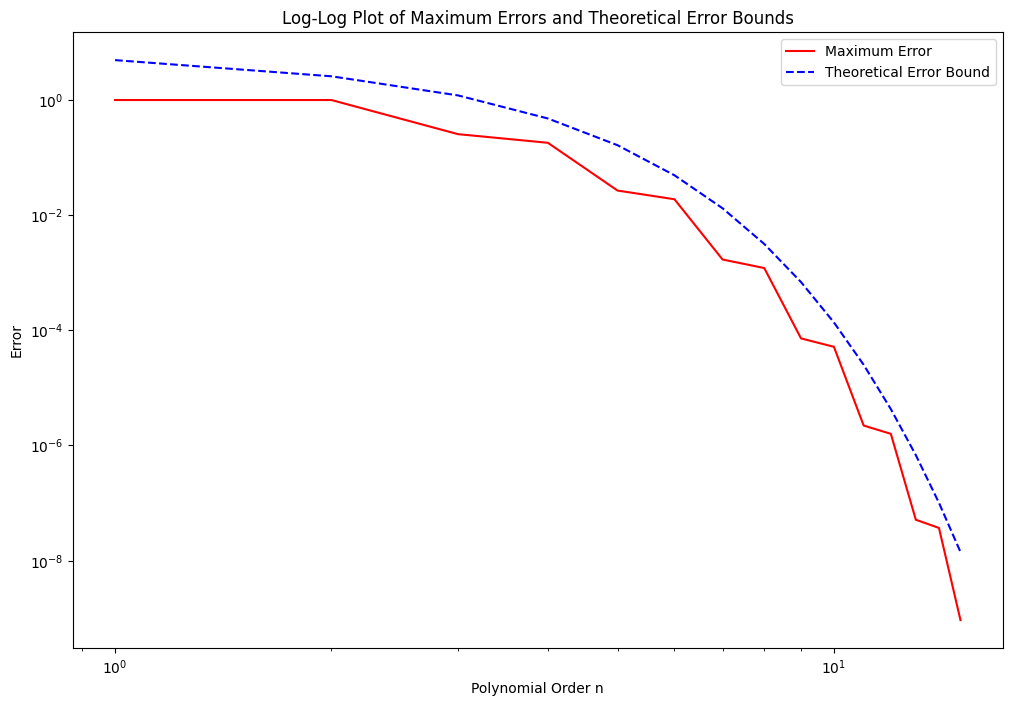

In [ ]:
# For Π1f, . . . , Π15f compute the maximum error on the given interval, and plot that maximum error in the y-axis in terms of the polynomial
# order n in the x-axis using loglog. Also include in the plot the right-hand-side of Equation (2).

# strategy: inside a for loop, compute coefficients, evaluate interpolant
# for n = 1,...,15 and save the corresponding value of the maximum error and
# rhs of Equation (2)

# Function to compute the theoretical error bound
def error_bound(n):
    """
    Calculate the theoretical error bound for the n-th order Lagrange interpolant of sin(px).

    Parameters:
        n (int): The order of the polynomial interpolant.

    Returns:
        float: The calculated error bound based on the maximum (n+1)-th derivative of sin(px).
    """
    # For f(x) = sin(x/p), the (n+1)-th derivative has a maximum absolute value of p^(n+1)
    max_derivative = (1/p)**(n+1)

    # Error bound formula from the document
    return (max_derivative / (4 * (n + 1))) * ((I[1] - I[0]) / n)**(n + 1)

# Lists to store maximum errors and theoretical bounds
max_errors = []
theoretical_bounds = []

# Compute errors and bounds for polynomial orders from 1 to 15
for n in range(1, 16):
    # Compute the coefficients of the interpolant
    coeffs = lagrangeInterp(f, I, n)
    # Evaluate the interpolant at dense points within the interval
    interpolant_values = evaluateInterpolant(coeffs, I, x_dense, N=1)
    # Compute the actual function values at the same points
    function_values = f(x_dense)
    # Calculate absolute errors and find the maximum error
    errors = np.abs(function_values - interpolant_values)
    max_error = np.max(errors)
    max_errors.append(max_error)
    # Compute the theoretical error bound for the current order
    theoretical_bounds.append(error_bound(n))

# Plotting the results using a log-log scale
plt.figure(figsize=(12, 8))
plt.loglog(range(1, 16), max_errors, 'r-', label='Maximum Error')
plt.loglog(range(1, 16), theoretical_bounds, 'b--', label='Theoretical Error Bound')

# Adding plot details
plt.title('Log-Log Plot of Maximum Errors and Theoretical Error Bounds')
plt.xlabel('Polynomial Order n')
plt.ylabel('Error')
plt.legend()
plt.show()

# Discussion question A.2:
# Which of both curves (true error and right-hand-side of Equation (2)) is larger? How can this be explained from the theory?

# Answer:
# Typically, the true error curve is below the curve of the right-hand-side of Equation (2). This is because the theoretical error bound
# provided by Equation (2) is an upper bound estimate. The actual error often does not reach this theoretical maximum due to specific
# properties of the function and the polynomial approximation used. The theoretical error bound assumes the worst-case scenario based on
# the maximum value of the (n+1)-th derivative of the function over the interval, which may not always manifest at every point within the
# interval. Thus, while the theoretical error gives a safe upper limit on the error, the true error might be significantly lower, depending
# on how well the polynomial approximates the function across the interval.



## **B. Piecewise interpolation and stability analysis**

In [ ]:
## Piecewise interpolation
#
# INPUT:
# f             f scalar-valued function
# interval      interpolation interval [a, b]
# n             interpolation order
# N             number of subintervals
#
# OUTPUT:
# coeffs        multidimensional array, i-th element is an array containing the
#               centered coefficients of i-th subinterval (you can do it also with lists)
# intervals     multidimensional array, i-th element is an array containing the
#               beginning and endpoint of i-th subinterval (you can do it also with lists)


def piecewiseInterp(f, interval, n, N):
    a, b = interval
    # Compute the length of each subinterval
    subinterval_length = (b - a) / N

    # Initialize the lists to store coefficients and subintervals
    coeffs = []
    intervals = []

    # Loop over each subinterval
    for i in range(N):
        # Define the start and end of the subinterval
        sub_a = a + i * subinterval_length
        sub_b = sub_a + subinterval_length
        sub_interval = [sub_a, sub_b]
        intervals.append(sub_interval)

        # Compute the coefficients for the subinterval
        sub_coeffs = lagrangeInterp(f, sub_interval, n)
        coeffs.append(sub_coeffs)

    return coeffs, intervals

# Define the overall interval and parameters
interval = [0, 2*np.pi]
n = 2  # Polynomial order
N = 2  # Number of subintervals

# Compute the piecewise interpolation of sin(x)
coefficients, subintervals = piecewiseInterp(test_function, interval, n, N)

# Print the results
print("Coefficients per subinterval:")
for coeff in coefficients:
    print(coeff)
print("\nSubintervals:")
for subinterval in subintervals:
    print(subinterval)


Coefficients per subinterval:
[-0.40528473  0.          1.        ]
[ 4.05284735e-01 -9.99551904e-17 -1.00000000e+00]

Subintervals:
[0.0, 3.141592653589793]
[3.141592653589793, 6.283185307179586]


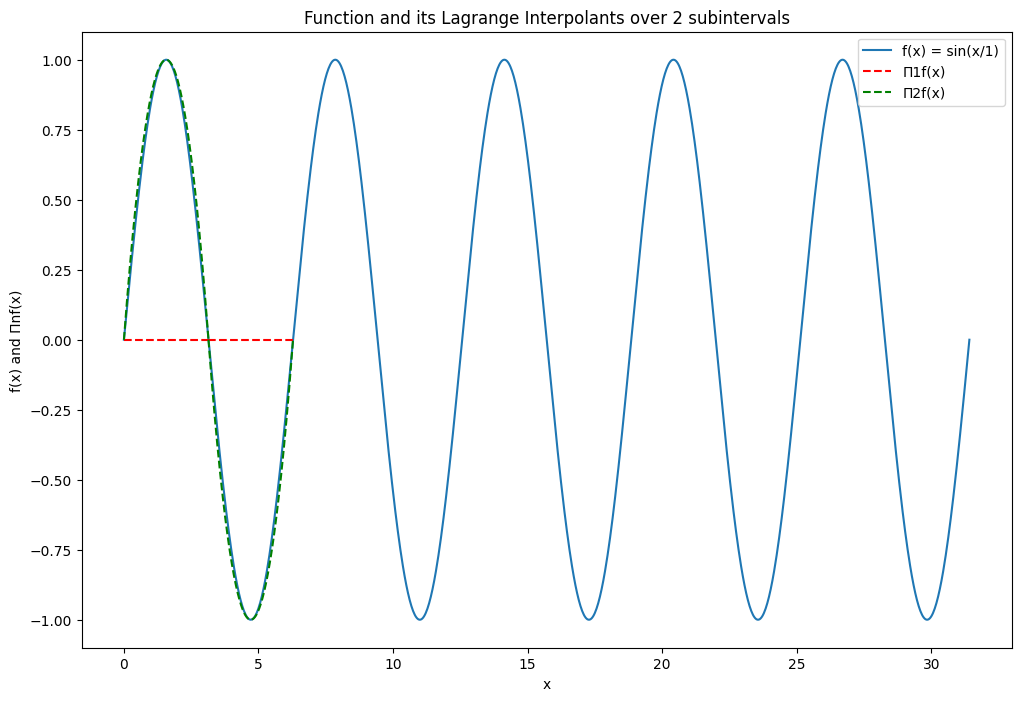

2 subintervals: [[0.0, 3.141592653589793], [3.141592653589793, 6.283185307179586]]


In [ ]:
# Consider f as before and keep the code depending on p. In a single figure, plot the function f and the piecewise Lagrange interpolants
# of order 1, 2, 3 and 4 using N = 4 subintervals.

p = 1
f = lambda x: np.sin(x/p)
I = [0, 2*np.pi*p]
N = 2


plt.figure(figsize=(12, 8))
plt.plot(Xq, f(Xq), label=f'f(x) = sin(x/{p})')


colors = ['red', 'green', 'blue', 'black']  # define some nice colors for plotting
for n in range(1, N+1): # loop over each degree of interpolation from 1 to N
    coeffs, intervals = piecewiseInterp(f, I, n, N)  # obtain coeff and intervals for piecewise interpolation of degree n
    for i in range(N):
        sub_interval = intervals[i]
        sub_x = np.linspace(sub_interval[0], sub_interval[1], 250)  # create x values evenly spaced within the sub-interval
        sub_coeffs = coeffs[i]
        midpoint = (sub_interval[0] + sub_interval[1]) / 2
        sub_y = np.polyval(sub_coeffs, sub_x - midpoint)  # evaluate the polynomial for the current sub-interval

        # adjusting the label to only appear once per n value
        if i == 0:
            label = f'Π{n}f(x)'  # label only the first subinterval per n
        else:
            label = None  # No label for subsequent subintervals

        plt.plot(sub_x, sub_y, '--', color=colors[n-1], label=label)


# Adding plot details
plt.title(f'Function and its Lagrange Interpolants over {N} subintervals')
plt.xlabel('x')
plt.ylabel('f(x) and Πnf(x)')
plt.legend()
plt.show()

print(f'{N} subintervals: {intervals}')


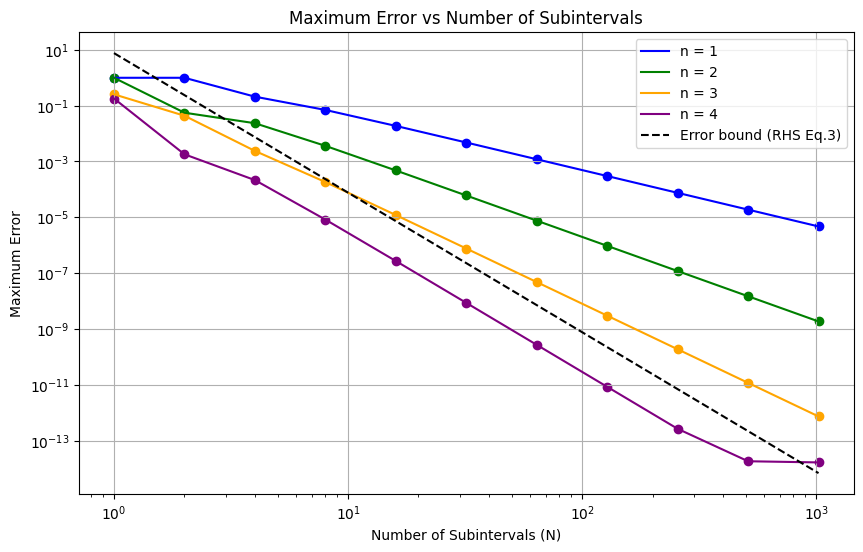

In [ ]:
# Make another figure with the logarithm of the error as a function of x, for the piecewise interpolants with n = 1,...,4 at
# a fixed number of subintervals N = 4. For each order n = 1, . . . , 4, plot the maximum error over the whole interval v/s the
# number of subintervals N = 2^l, for l = 0,...,10 using loglog, together with the right-hand side of Equation (3).

# Define the error function
def max_error(f, coeffs, intervals, n):
    """
    Compute the maximum error of the piecewise interpolant.

    Parameters:
        f (function): The original function.
        coeffs (list): List of coefficients for each subinterval.
        intervals (list): List of subintervals.
        n (int): Polynomial order of the interpolant.

    Returns:
        float: Maximum error of the piecewise interpolant.
    """
    max_err = 0  # Initialize maximum error
    # Loop over each subinterval
    for i in range(len(intervals)):
        sub_interval = intervals[i]  # Extract current subinterval
        sub_coeffs = coeffs[i]  # Extract coefficients for current subinterval
        sub_x = np.linspace(sub_interval[0], sub_interval[1], 250)  # Generate points within subinterval
        midpoint = (sub_interval[0] + sub_interval[1]) / 2  # Compute midpoint of subinterval
        # Evaluate interpolant at generated points
        interpolated_values = np.polyval(sub_coeffs, sub_x - midpoint)
        true_values = f(sub_x)  # Compute true function values at generated points
        error = np.max(np.abs(interpolated_values - true_values))  # Compute maximum error within subinterval
        max_err = max(max_err, error)  # Update maximum error
    return max_err

# Define the function f(x)
def f(x):
    return np.sin(x/2)

# Define the interval [a, b]
a, b = 0, 2*np.pi*2

# Define the range of number of subintervals N
Ns = [2**l for l in range(11)]

# Initialize lists to store maximum errors for each polynomial order
max_errors = [[] for _ in range(4)]

# Loop over polynomial orders
for n in range(1, 5):
    # Initialize list to store errors for each number of subintervals N
    errors = []
    # Loop over number of subintervals
    for N in Ns:
        # Compute piecewise interpolation
        coeffs, intervals = piecewiseInterp(f, [a, b], n, N)
        # Compute maximum error
        error = max_error(f, coeffs, intervals, n)
        errors.append(error)
    max_errors[n-1] = errors

# Plotting
plt.figure(figsize=(10, 6))
colors = ['blue', 'green', 'orange', 'purple']  # Define colors for each n value
for n, errors in enumerate(max_errors, start=1):
    plt.loglog(Ns, errors, label=f'n = {n}', color=colors[n-1])

    # Plotting N = 2^l points
    for l in range(11):
        plt.scatter(2**l, max_errors[n-1][l], color=colors[n-1])

# Plotting the right-hand side of the error bound equation
rhs = [(np.max(np.abs(np.gradient(f(np.linspace(a, b, 1000)), np.linspace(a, b, 1000), edge_order=2))) / (4*(n + 1))) * ((b - a) / (N * n))**(n+1) for N in Ns]
plt.loglog(Ns, rhs, 'k--', label='Error bound (RHS Eq.3)')

plt.title('Maximum Error vs Number of Subintervals')
plt.xlabel('Number of Subintervals (N)')
plt.ylabel('Maximum Error')
plt.legend()
plt.grid(True)
plt.show()

# Discussion question B.1:
# For fixed n, each of the error curves EnN f should result in (approximately) a straight line as a function of N
# in the double logarithmic plot. Explain that in view of the theory, and in particular why the slope of that lines changes with changing n.

# Answer:
# In a log-log plot, a linear relationship suggests a power law relationship between the variables. For the case of polynomial interpolation,
# the error decreases as the number of subintervals increases, which follows a power law decrease. The theoretical error bound for polynomial
# interpolation states that the error decreases as N^(-n-1), where n is the polynomial order. This relationship is due to the fact that higher
# order polynomials can approximate the function more accurately over smaller intervals, thus as n increases, the ability to closely match the
# function over each subinterval improves significantly.

# The slope of the line in a log-log plot corresponds to the exponent in the power law relationship. Thus, as n increases, the slope becomes steeper,
# indicating a faster decrease in error with increasing N. This is because higher order interpolants are more flexible and can adapt better to the
# function's changes within each subinterval.



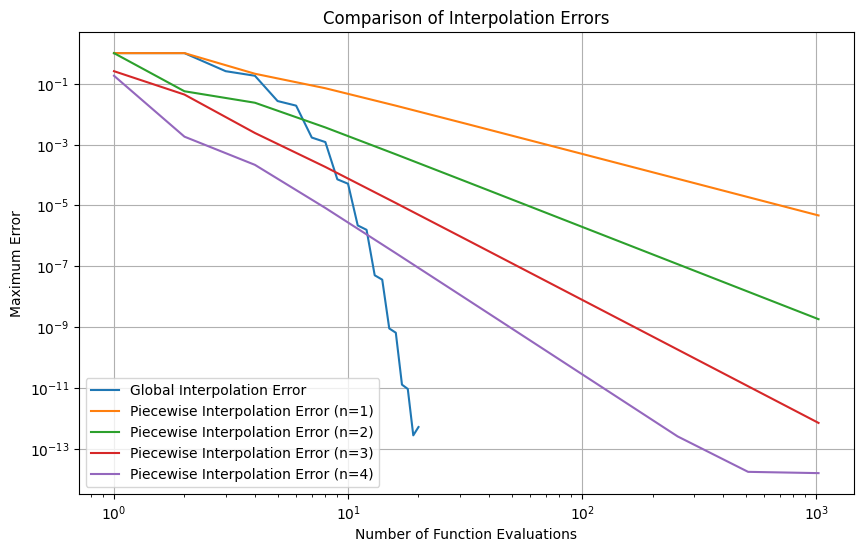

In [ ]:
# Comparison
# In a single figure, using loglog, plot the following computed errors v/s the number of required function evaluations :
# • One curve for the maximum (global) Lagrange interpolation error max_x∈[a,b] |Enf(x)|,
# where n = 1, . . . , 20 is varied in order to obtain different number of functions evaluations.
# • One curve for each n = 1, . . . , 4: the maximum piecewise Lagrange interpolation error max_x∈[a,b] |E_(n)^(N)f(x)|,
# where N = 2l, l = 0,...,10, is varied in order to obtain different number of functions evaluations.

# Define the function f(x)
def f(x):
    return np.sin(x/2)

# Define the interval [a, b]
a, b = 0, 2*np.pi*2

# Define the range of number of subintervals N
Ns = [2**l for l in range(11)]

# Initialize lists to store maximum errors for global and piecewise interpolation
global_errors = []
piecewise_errors = [[] for _ in range(4)]

# Corrected global interpolation error calculation
for n in range(1, 21):
    # Compute global interpolation, simulating a single 'piecewise' interval
    coeffs_global, _ = piecewiseInterp(f, [a, b], n, 1)
    # Properly format the interval for global error calculation
    global_interval = [[a, b]]  # Ensure it's a list of one list representing the whole interval
    # Compute maximum error, pass the interval in correct format
    error_global = max_error(f, coeffs_global, global_interval, n)
    global_errors.append(error_global)


# Loop over polynomial orders for piecewise interpolation
for n in range(1, 5):
    # Initialize list to store errors for each number of subintervals N
    errors_piecewise = []
    # Loop over number of subintervals
    for N in Ns:
        # Compute piecewise interpolation
        coeffs_piecewise, intervals = piecewiseInterp(f, [a, b], n, N)
        # Compute maximum error, now correctly passing 'n'
        error_piecewise = max_error(f, coeffs_piecewise, intervals, n)
        errors_piecewise.append(error_piecewise)
    piecewise_errors[n-1] = errors_piecewise



# Compute number of function evaluations for global interpolation
evaluations_global = list(range(1, 21))

# Compute number of function evaluations for piecewise interpolation
evaluations_piecewise = [2**l for l in range(11)]

# Plotting
plt.figure(figsize=(10, 6))

# Plot global interpolation error
plt.loglog(evaluations_global, global_errors, label='Global Interpolation Error')

# Plot piecewise interpolation errors for each n
for n, errors_piecewise in enumerate(piecewise_errors, start=1):
    plt.loglog(evaluations_piecewise, errors_piecewise, label=f'Piecewise Interpolation Error (n={n})')

plt.title('Comparison of Interpolation Errors')
plt.xlabel('Number of Function Evaluations')
plt.ylabel('Maximum Error')
plt.legend()
plt.grid(True)
plt.show()

# Discussion question B.2:
# (a) Which method of increasing the interpolation accuracy leads to a smaller number of function evaluations for a given accuracy?
# Justify your answer using the error estimation (3).

# Answer:
# Increasing the polynomial order (n) generally leads to a more significant improvement in accuracy per function evaluation compared
# to increasing the number of subintervals (N). This is because increasing n improves the polynomial's ability to fit more complex
# functions with fewer intervals, thus reducing the error more substantially for each additional polynomial term than simply dividing
# the domain into more pieces without improving the order of the polynomial.

# Justification using the error estimation (3):
# Error estimation (3) suggests that the error decreases exponentially with an increase in n and polynomially with an increase in N.
# Therefore, for a given number of function evaluations, increasing n tends to be more efficient at reducing error than increasing N,
# especially for smooth functions where higher-order derivatives are small.


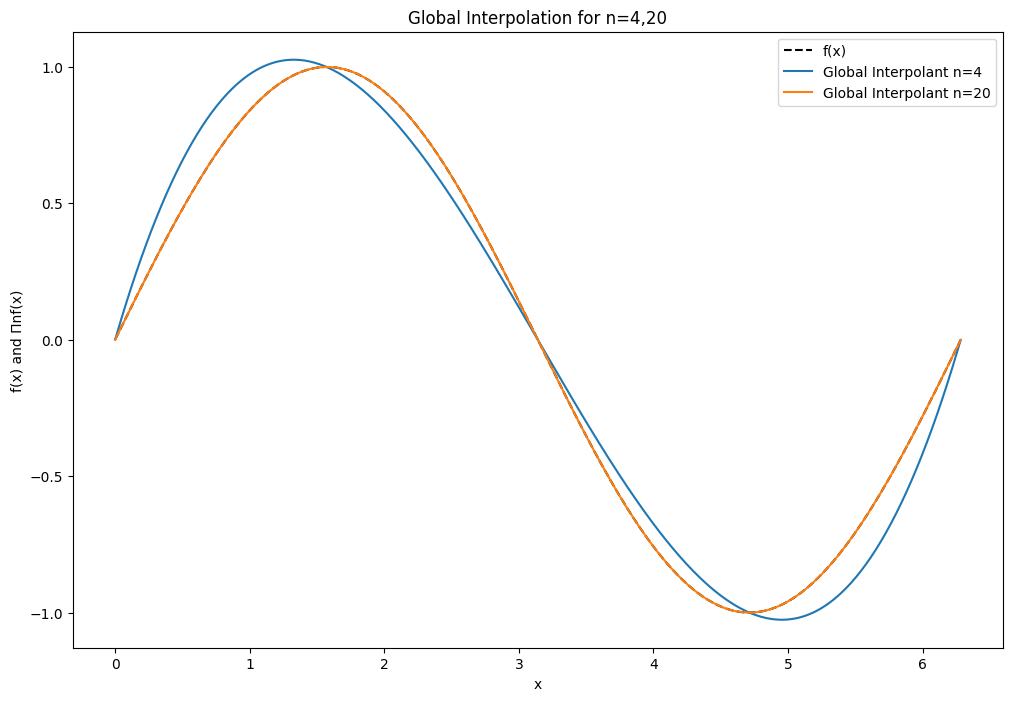

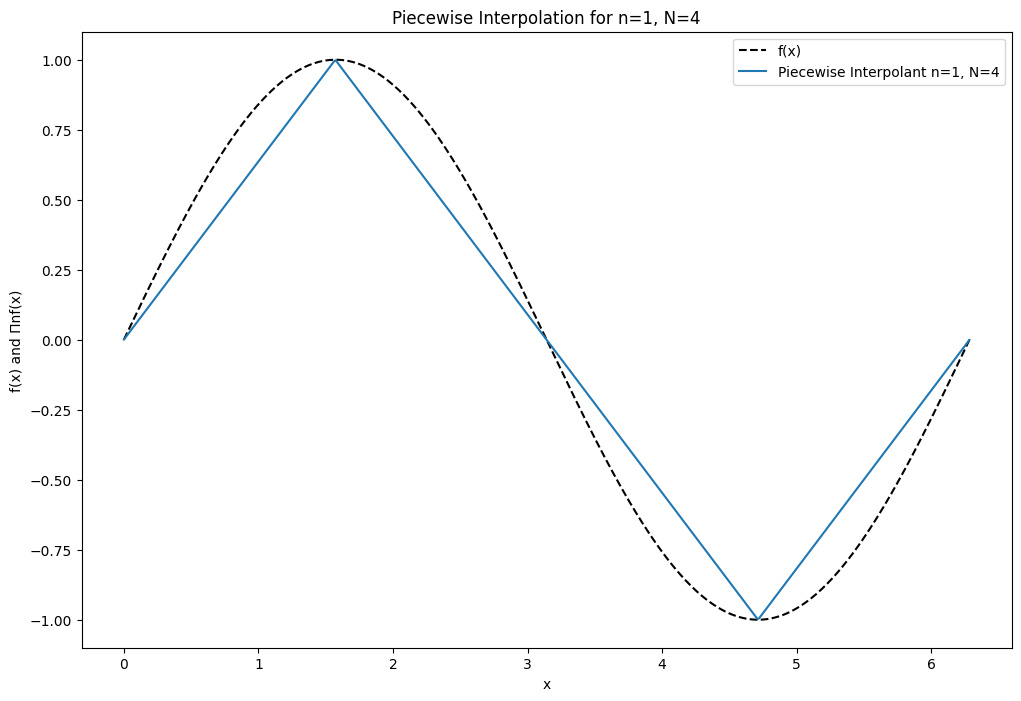

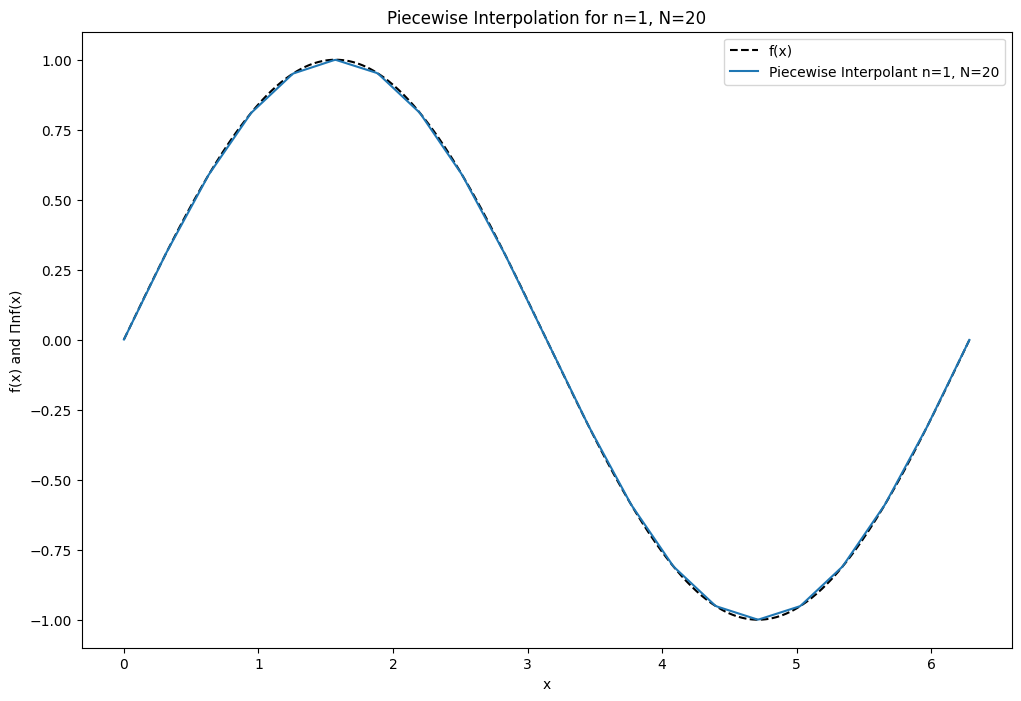

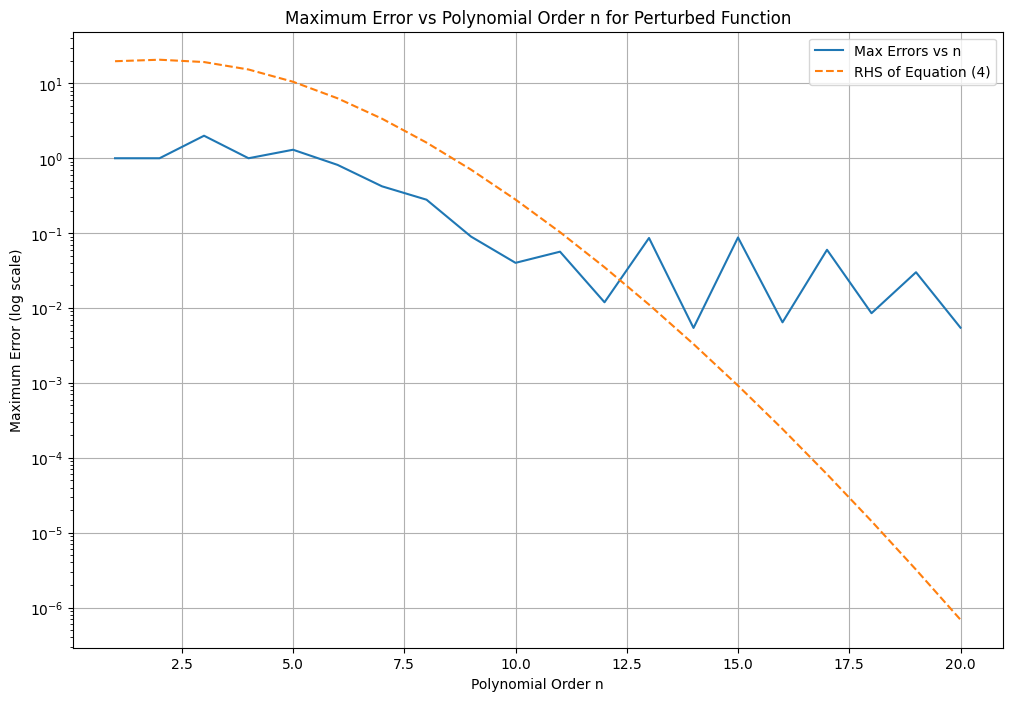

In [ ]:
# Consider now the interpolation of the perturbed function f (x) = f (x) + 10^-3 cos(8x/p), p ∈ N.
# Note that the total error is now given by Πnf(x) − f(x) and Πn f(x) − f(x) for Lagrange and piecewise Lagrange interpolation respectively.
# Hence you should use (4) and (5) as the corresponding upper bounds.
# Create separate plots with:
# • f(x) and Πnf(x) for n = {4,20}.
# • f(x) and Πnf(x)for n=1, N={4,20}.
# • max_x(Πnf~(x)−f(x)) v/s n, with n = 1, . . . , 20. Include also in the plot the right-hand-side of (4). Use loglog.
# • max_x(Πnf~(x) − f(x)) v/s N, for n = 1,2,3,4 with N = 2^j , j=0,...,10. Include also in the plot the right-hand-side of (5). Use loglog.

p = 3  # Can vary as needed

# Define the perturbed function
def f_perturbed(x, p):
    return np.sin(x) + 10**(-3) * np.cos(8*x/p) #!!! Change made_;

# Define the x values for plotting
x_vals = np.linspace(0, 2 * np.pi, 500) # removed p
f_vals = f_perturbed(x_vals, p)

# global Interpolation for n = 4, 20
plt.figure(figsize=(12, 8))
plt.plot(x_vals, f_vals, label='f(x)', linestyle='--', color='black')

for n in [4, 20]: # iterate over a couple of predefined degrees of interpolation (4 and 20)
    coeffs = lagrangeInterp(lambda x: f_perturbed(x, p), [min(x_vals), max(x_vals)], n) # compute Lagrange interpolation coefficients using perturbed function values
    interp_vals = evaluateInterpolant(coeffs, [min(x_vals), max(x_vals)], x_vals, 1)  # evaluate the interpolant over the entire range of x values
    plt.plot(x_vals, interp_vals, label=f'Global Interpolant n={n}')

plt.title('Global Interpolation for n=4,20')
plt.xlabel('x')
plt.ylabel('f(x) and Πnf(x)')
plt.legend()
plt.show()

# Piecewise Interpolation for n = 1, N = 4, 20
for N in [4, 20]:
    plt.figure(figsize=(12, 8))
    plt.plot(x_vals, f_vals, label='f(x)', linestyle='--', color='black')
    coeffs, intervals = piecewiseInterp(lambda x: f_perturbed(x, p), [min(x_vals), max(x_vals)], 1, N)

    # initialize a numpy array for interpolated values
    interp_vals = np.zeros_like(x_vals)

    # calc interpolated values for each subinterval
    for k in range(N):
        sub_interval = intervals[k]
        coeff = coeffs[k]
        # Select x values that are within the current subinterval
        sub_x_vals = x_vals[(x_vals >= sub_interval[0]) & (x_vals <= sub_interval[1])]
        m = (sub_interval[0] + sub_interval[1]) / 2
        # Evaluate the polynomial at points centered around the midpoint
        sub_interp_vals = np.polyval(coeff, sub_x_vals - m)
        # Place evaluated values in the corresponding indices in interp_vals
        interp_vals[(x_vals >= sub_interval[0]) & (x_vals <= sub_interval[1])] = sub_interp_vals

    plt.plot(x_vals, interp_vals, label=f'Piecewise Interpolant n=1, N={N}')
    plt.title(f'Piecewise Interpolation for n=1, N={N}')
    plt.xlabel('x')
    plt.ylabel('f(x) and Πnf(x)')
    plt.legend()
    plt.show()

# define the RHS of Equation (4) using a lambda function
rhs = lambda n: (1 / (4 * (n + 1))) * ((b - a) / n)**(n + 1)

# compute maximum error vs. n
errors_n = []
n_range = range(1, 21)
for n in n_range:
    coeffs = lagrangeInterp(lambda x: f_perturbed(x, p), [a, b], n)  # compute Lagrange interpolation coefficients using perturbed function values for the given interval [a, b] and degree n
    interp_vals = evaluateInterpolant(coeffs, [a, b], x_vals, 1) # eval the interpolant over the entire range of x values
    max_error = np.max(np.abs(interp_vals - f_vals)) #calc the maximum error between the interpolant and the true function values
    errors_n.append(max_error)  # .append the maximum error to the list of errors for this degree of interpolation

# plotting results using semilogy
plt.figure(figsize=(12, 8))
plt.semilogy(n_range, errors_n, label='Max Errors vs n')
plt.semilogy(n_range, [rhs(n) for n in n_range], label='RHS of Equation (4)', linestyle='--')

plt.title('Maximum Error vs Polynomial Order n for Perturbed Function')
plt.xlabel('Polynomial Order n')
plt.ylabel('Maximum Error (log scale)')
plt.legend()
plt.grid(True)
plt.show()




In [ ]:
# Discussion question B.3:
# (a) Describe the behavior of max_x(Πnf^(x) − f(x)) with respect to n and explain it in view of the theory.
# Answer: The error generally decreases as the polynomial order n increases. This is because higher-order polynomials
# can more accurately approximate complex functions within a given interval due to their increased flexibility.
# The theoretical error for polynomial interpolation indicates that the error should decrease at a rate proportional
# to N^(-n-1) as n increases, assuming the function is sufficiently smooth and the interval is appropriately small.

# (b) Describe the behavior of max_x(Πn f^(x) − f(x)) with respect to N and explain it in view of the theory.
# Answer: As the number of subintervals N increases, the maximum error tends to decrease. This decrease occurs because smaller
# subintervals allow the polynomial interpolant to better conform to local variations in the function, reducing the
# overall interpolation error. The error reduction rate as N increases is theoretically expected to be proportional to
# (1/N)^(n+1), where n is the polynomial order used within each subinterval.

# (c) In case that you would know that the “measured” function values are perturbed, but you just know that the perturbations
# correspond to random variables at each node every time, and therefore they will change every time you measure them,
# which combination of N and n would (most likely) lead to a more similar error when repeating the measurements?
# Justify your answer in view of the theory.
# Answer: A lower polynomial order (n) and a higher number of subintervals (N) would likely lead to more consistent error behavior
# under repeated measurements with random perturbations at each node. Lower-order polynomials are less sensitive to small
# changes in function values, reducing the impact of random noise. Meanwhile, increasing N allows the interpolant to adapt
# more locally to the function's behavior, mitigating large-scale deviations due to noise. This combination provides a balance
# between flexibility and stability in the presence of data uncertainty.



## **C. Integration**

In [ ]:
# Given the centered coefficients ci obtained from piecewiseInterp we can use (6) for the exact integration of the interpolating polynomial.
# Implement compositeIntegr which approximately computes the integral of some input function f using piecewise Lagrange interpolation of order
# n on N subintervals.


## Composite integration
#
# INPUT
# f                 f scalar-valued function
# interval          interpolation interval [a, b]
# n                 interpolation order
# N                 number of subintervals
#
# OUTPUT
# num_integral      approximate integral


def compositeIntegr(f, interval, n, N):
    a, b = interval
    total_length = b - a
    subinterval_length = total_length / N
    num_integral = 0

    for i in range(N):
        # Define the subinterval
        sub_a = a + i * subinterval_length
        sub_b = sub_a + subinterval_length
        sub_interval = [sub_a, sub_b]

        # Calculate coefficients for this subinterval
        coeffs = lagrangeInterp(f, sub_interval, n)

        # We need to integrate these coefficients. Since they're centered,
        # integrate over the shifted interval from -subinterval_length/2 to subinterval_length/2
        # and adjust by the midpoint for the actual evaluation of the polynomial.
        midpoint = (sub_a + sub_b) / 2
        shifted_x = np.linspace(-subinterval_length / 2, subinterval_length / 2, 100)

        # Evaluate polynomial at these points
        poly_vals = np.polyval(coeffs, shifted_x)

        # Use numerical integration (e.g., the trapezoidal rule) over the shifted interval
        integral = np.trapz(poly_vals, shifted_x)

        # Sum the integrals from each subinterval
        num_integral += integral

    return num_integral

# Example usage
def example_function(x):
    return np.sin(x) + np.cos(x)

interval = [0, np.pi]
n = 3  # Polynomial order
N = 10  # Number of subintervals

approx_integral = compositeIntegr(example_function, interval, n, N)
print("Approximate integral:", approx_integral)


Approximate integral: 2.0000013329152337


In [ ]:
# Discussion question C.1
# Test the degrees of exactness for the Trapezoidal and Simpson's rules using the compositeIntegr function.
# Trapezoidal rule is expected to have a degree of exactness of 1 (exact for linear functions),
# and Simpson's rule has a degree of exactness of 3 (exact for cubic functions).

# Define a linear function for which the Trapezoidal rule should integrate exactly.
def linear_function(x):
    # Linear function: ax + b; integral from 0 to 1 of (2x + 3) is (x^2 + 3x) evaluated from 0 to 1 = 1^2 + 3*1 - (0^2 + 3*0) = 4
    return 2 * x + 3

# Define a cubic function for which Simpson's rule should integrate exactly (degree of exactness 3).
def cubic_function(x):
    # Cubic function: ax^3 + bx^2 + cx + d; integral from 0 to 1 of (x^3 - 3x^2 + 3x + 1) is (1/4x^4 - x^3 + 3/2x^2 + x) evaluated from 0 to 1 = 0.25 - 1 + 1.5 + 1 - 0 = 1.75
    return x**3 - 3 * x**2 + 3 * x + 1

# Integral intervals
interval = [0, 1]

# Using Trapezoidal rule (n=1) on a linear function
trapezoidal_integral = compositeIntegr(linear_function, interval, 1, 1)  # Should exactly match the integral of the linear function

# Using Simpson's rule (n=3) on a cubic function
simpsons_integral = compositeIntegr(cubic_function, interval, 3, 1)  # Should exactly match the integral of the cubic function

# Print results to verify exactness
print("Trapezoidal rule integral of linear function (expected 4):", trapezoidal_integral)
print("Simpson's rule integral of cubic function (expected 1.75):", simpsons_integral)

# Explanation:
# The Trapezoidal rule integrates linear functions exactly because it approximates the area under the curve
# using trapezoids, which are precise for linear segments.
# Simpson's rule, using parabolic arcs to approximate the area, integrates up to cubic functions exactly,
# demonstrating its higher degree of exactness. This rule uses a quadratic (parabolic) approximation,
# which can perfectly fit any polynomial of degree up to three over each interval it is applied.


Trapezoidal rule integral of linear function (expected 4): 4.000000000000001
Simpson's rule integral of cubic function (expected 1.75): 1.7499744923987353


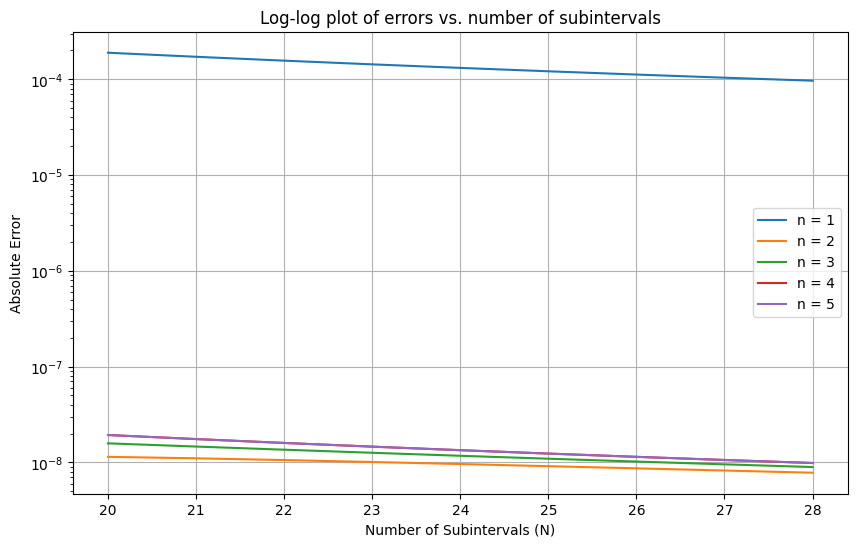

In [ ]:
# Discussion question C.2:
# (a) For each n = 1,...,5: compute the approximate integral of f(x) = sin2(x) over the interval [0, 1] using N = 20 , . . . , 28 intervals,
# and compute the error for each N. Plot using loglog the error as function of the number of subintervals for each n = 1, . . . , 5.

# Define the function to be integrated
def f(x):
    return np.sin(x) ** 2

# Define the interval for integration
interval = [0, 1]

# Number of subintervals to test
N_values = range(20, 29)  # From N = 20 to N = 28

# Polynomial orders to test
n_values = range(1, 6)  # From n = 1 to n = 5

# Function to compute the exact integral of sin^2(x) from 0 to 1
def exact_integral_sin_squared():
    # Integral of sin^2(x) from 0 to 1 is 1/2 * x - 1/4 * sin(2x) evaluated from 0 to 1
    return (1/2 * 1 - 1/4 * np.sin(2 * 1)) - (1/2 * 0 - 1/4 * np.sin(2 * 0))

# Store exact integral value
exact_integral = exact_integral_sin_squared()

# Prepare to store errors for plotting
errors = {n: [] for n in n_values}

# Compute the integral using compositeIntegr for various n and N
for n in n_values:
    for N in N_values:
        approx_integral = compositeIntegr(f, interval, n, N)
        error = np.abs(approx_integral - exact_integral)
        errors[n].append(error)

# Plotting the errors using loglog plot
plt.figure(figsize=(10, 6))
for n in n_values:
    plt.semilogy(N_values, errors[n], label=f'n = {n}')

plt.title('Log-log plot of errors vs. number of subintervals')
plt.xlabel('Number of Subintervals (N)')
plt.ylabel('Absolute Error')
plt.legend()
plt.grid(True)
plt.show()



In [ ]:
# Discussion question C.2 (b):
# Degree of exactness for each n based on error curves:
# - The degree of exactness for a polynomial interpolation can be inferred by observing how well it integrates polynomials of up to its own degree.
# - If the error curve for a given n shows significantly lower errors compared to higher n values especially for small N, this suggests a higher degree of exactness.
# - This is based on the theoretical expectation that polynomial interpolation of order n exactly integrates any polynomial of degree ≤ n over each subinterval.

# Justification from theory:
# - According to polynomial interpolation theory, a polynomial interpolator of order n should integrate any polynomial of degree n or lower exactly within each subinterval.
# - Therefore, the observed decrease in errors with increasing n and consistent low errors for higher N values align with this theoretical framework.

# Numerical test for hypothesis:
# - To test this hypothesis numerically, one could perform integration on known polynomials of specific degrees (e.g., x^2, x^3) and verify if the integral computed by the interpolator matches the analytical integral exactly.
# - For instance, for n=3, one might test integration accuracy on x^3 over various subinterval configurations to confirm if the error approaches zero as expected for polynomial of degree ≤ 3.

# Code snippet for numerical testing (hypothetical example):
# Example to test if n=3 exactly integrates x^3 over the interval [0,1]
def cubic_test_function(x):
    return x**3

# Compute the analytical integral of x^3 from 0 to 1
analytical_integral_cubic = 1**4 / 4 - 0**4 / 4  # Should be 0.25

# Use compositeIntegr to compute the integral numerically
computed_integral_cubic = compositeIntegr(cubic_test_function, [0, 1], 3, 1)  # Using n=3, N=1

# Print and check if computed integral matches analytical integral
print("Computed Integral of x^3 (n=3, N=1):", computed_integral_cubic)
print("Analytical Integral of x^3:", analytical_integral_cubic)
# This would verify if n=3 can integrate a cubic polynomial exactly, supporting the degree of exactness hypothesis.


Computed Integral of x^3 (n=3, N=1): 0.25002550760126524
Analytical Integral of x^3: 0.25
